#Setup

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
!unzip 'sentiment labelled sentences.zip'

--2022-12-06 23:48:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip.1’

sentiment labelled  100%[===================>]  82.21K   267KB/s    in 0.3s    

2022-12-06 23:48:44 (267 KB/s) - ‘sentiment labelled sentences.zip.1’ saved [84188/84188]

Archive:  sentiment labelled sentences.zip
replace sentiment labelled sentences/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
x = []
y = []
with open('/content/sentiment labelled sentences/imdb_labelled.txt') as f:
    for line in f:
      x_val, y_val = line.split('  	')
      x.append(''.join(x_val))
      y.append(int(y_val.rstrip('\n')))

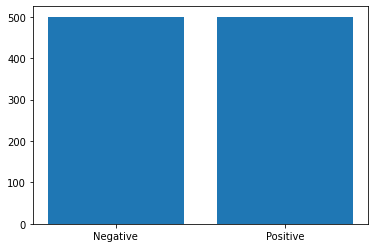

In [ ]:
#creating bar chart distrbution
import matplotlib.pyplot as plt
labels = ['Negative', 'Positive']
counts = [0, 0]
for num in y:
  counts[num] += 1
plt.bar(labels, counts)
plt.show()

#Sentiment Prediction using **[LSTM]**

##Imports and Hyperparameter Tuning

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

epochs = [10, 15, 20]
Num_Epochs = epochs[1]
rates = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3]
l_r = rates[2]
optimizers = [tf.keras.optimizers.SGD(learning_rate=l_r), 
              tf.keras.optimizers.RMSprop(learning_rate=l_r),
              tf.keras.optimizers.Adam(learning_rate=l_r)]
OPTIMIZER = optimizers[2]

activations = ['sigmoid', 'relu']
act_func = activations[0]

regs = [regularizers.L1(0.01), regularizers.L2(0.01), regularizers.L1L2(0.01)]
reg = regs[1]

##Run Model

In [ ]:
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

vocab_size = 10000
sequenceLen = 20

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, maxlen=sequenceLen, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=sequenceLen, padding='post', truncating='post')

model = Sequential()
model.add(Embedding(vocab_size, 100, embeddings_regularizer = reg))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(1, activation=act_func))

model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
history = model.fit(train_padded, y_train, epochs=Num_Epochs, validation_split = 0.2)

Epoch 1/15
20/20 [==============================] - 4s 51ms/step - loss: 7.1067 - accuracy: 0.5063 - val_loss: 5.0415 - val_accuracy: 0.4812
Epoch 2/15
20/20 [==============================] - 0s 10ms/step - loss: 3.8722 - accuracy: 0.5125 - val_loss: 2.8887 - val_accuracy: 0.5063
Epoch 3/15
20/20 [==============================] - 0s 10ms/step - loss: 2.3591 - accuracy: 0.5422 - val_loss: 1.9036 - val_accuracy: 0.5312
Epoch 4/15
20/20 [==============================] - 0s 10ms/step - loss: 1.6346 - accuracy: 0.5531 - val_loss: 1.4020 - val_accuracy: 0.5188
Epoch 5/15
20/20 [==============================] - 0s 9ms/step - loss: 1.2445 - accuracy: 0.5844 - val_loss: 1.1208 - val_accuracy: 0.5312
Epoch 6/15
20/20 [==============================] - 0s 10ms/step - loss: 1.0083 - accuracy: 0.6281 - val_loss: 0.9424 - val_accuracy: 0.5938
Epoch 7/15
20/20 [==============================] - 0s 10ms/step - loss: 0.8122 - accuracy: 0.7000 - val_loss: 0.8217 - val_accuracy: 0.6187
Epoch 8/15
20/

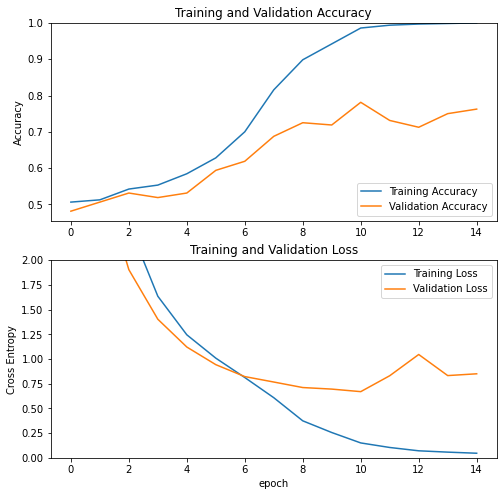

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pred = model.predict(test_padded)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))
counter = 0
for i in range(0, len(pred)):
  if pred[i] != y_test[i]:
    print('Input : ' + x_test[i])
    if pred[i] == 0:
      print('Predicted : Negative')
    else:
      print('Predicted : Positive')
    if y_test[i] == 0:
      print('Actual : Negative')
    else:
      print('Actual : Positive')
    print()
    counter += 1
  if(counter >= 10):
    break

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.81      0.81      0.81       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Input : The film gives meaning to the phrase, "Never in the history of human conflict has so much been owed by so many to so few.
Predicted : Negative
Actual : Positive

Input : I can't see how this movie can be an inspiration to anyone to come out or overcome fear and rejection.
Predicted : Positive
Actual : Negative

Input : This is a masterful piece of film-making, with many themes simmering and occasionally boiling over in this warts and all study of the poet's bohemian, self-indulgent wartime years that span the aerial bombardments of London and the outward tranquillity of a Welsh coastal retreat - the borderl

#Sentiment Prediction using naive Bayes

##Imports and Hyperparameter Tuning

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

ngram_R = [(1, 1), (2, 2), (3, 3)]
ngram = ngram_R[0]
priors = [[0.25, 0.75], [0.5, 0.5], [0.75, 0.25]]
c_p = priors[0]


##Run Program

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.2, random_state=5)

X_train_Act, X_test_Act, Y_train_Act, Y_test_Act = train_test_split(x, y, test_size=0.2, random_state=5)

MNB = MultinomialNB(class_prior = c_p)
MNB.fit(X_train, Y_train)

MultinomialNB(class_prior=[0.25, 0.75])

In [ ]:
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')
print()
counter = 0
for i in range(0, len(predicted)):
  if predicted[i] != Y_test[i]:
    print('Input : ' + X_test_Act[i])
    if predicted[i] == 0:
      print('Predicted : Negative')
    else:
      print('Predicted : Positive')
    if Y_test[i] == 0:
      print('Actual : Negative')
    else:
      print('Actual : Positive')
    print()
    counter += 1
  if(counter >= 10):
    break

82.50%

Input : There were too many close ups.
Predicted : Positive
Actual : Negative

Input : The characters were very 'stagey' and the storyline was a lot like a stage farce.
Predicted : Positive
Actual : Negative

Input : Very little music or anything to speak of.
Predicted : Positive
Actual : Negative

Input : The characters are fleshed out surprisingly well, particularly Grimes and Blake, and all the actors deliver their sharply scripted lines with just the right amount of deadpan tongue in cheek to make the dialogue both hilarious and realistic.
Predicted : Negative
Actual : Positive

Input : Predictable, but not a bad watch.
Predicted : Negative
Actual : Positive

Input : This scene is very strong and unpleasant.
Predicted : Positive
Actual : Negative

Input : there are so many problems i dont know where to start.
Predicted : Positive
Actual : Negative

Input : The least said about the acting the better.
Predicted : Positive
Actual : Negative

Input : You share General Loewenhie